## Contributions of visual and proprioceptive information to travelled distance estimation during changing sensory congruencies
Jennifer L Campos, John S Butler, Heinrich H. Bülthoff
Experimental Brain Research

__Abstract__ Recent research has provided evidence that visual and body-based cues (vestibular, proprioceptive
and efference copy) are integrated using a weighted linear sum during walking and passive transport. However, little
is known about the specific weighting of visual information when combined with proprioceptive inputs alone, in
the absence of vestibular information about forward selfmotion. 

Therefore, in this study, participants walked in place on a stationary treadmill while dynamic visual information was updated in real time via a head-mounted display. The task required participants to travel a predefined distance and subsequently match this distance by adjusting an egocentric, in-depth target using a game controller. Travelled distance information was provided either through
visual cues alone, proprioceptive cues alone or both cues combined. In the combined cue condition, the relationship
between the two cues was manipulated by either changing the visual gain across trials (0.7×, 1.0×, 1.4×; Exp. 1) or
the proprioceptive gain across trials (0.7×, 1.0×, 1.4×; Exp. 2). 

Results demonstrated an overall higher weighting of proprioception over vision. These weights were scaled, however, as a function of which sensory input provided more stable information across trials. Specifically, when visual gain was constantly manipulated, proprioceptive weights were higher than when proprioceptive gain was constantly manipulated. These results therefore reveal interesting characteristics of cue-weighting within the context of unfolding spatio-temporal cue dynamics.
# Introduction
In this notebook we will simulate the results of the Leaky Integrator from the paper by Campos et al. 2014 [1].

In [1]:
## Library
import numpy as np
import math 
import matplotlib.pyplot as plt

## Leaky Integrator
The presented distance travelled for the visual, proprioceptive and congruent combined conditions was each fitted by a leaky spatial integrator mode.
The model describes the change of presented distance travelled ($p$) with respect to the change of the adjusted target distance estimate ($x$)
\begin{equation}
\frac{d p}{dx}=-\alpha p+k
\end{equation}
for $0\leq x \leq 10m$, where $k$ and $\alpha$ are the sensory gain and the leak rate, respectively.
This model has the exact solution
\begin{equation}
p(x)=\big( \frac{k}{\alpha}\big)(1-exp(-\alpha x))
\end{equation}
In this simulation we set $\alpha=0.5$ and $k=10$.


In [2]:
alpha=0.5
k=10

To numiercally approximate the solution we discretise the continuous domain using a step size, $h=1$, 
which gives
\begin{equation}
x_i=0+i h,
\end{equation}
for i=0,...10.

The Figure below illustrate the discrete domain.

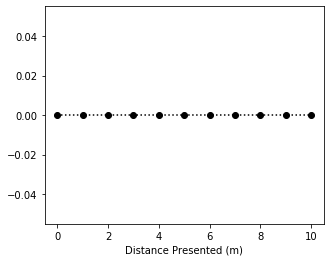

In [3]:
h=1
x_end=10
x=np.arange(0,x_end+h/2,h)
fig = plt.figure(1,figsize=(5,4))
ax = fig.add_subplot(1,1,1)
ax.plot(x,0*x,'o:',color='k')
ax.set_xlabel('Distance Presented (m)')
plt.show()

In [4]:
N=int(x_end/h) # Number of Steps
Numerical_Solution=np.zeros(N+1) # Numerical Solution P

Analytic_Solution=k/alpha*(1-np.exp(-alpha*x))
# Initial Conditions
Numerical_Solution[0]=0

We numerically approximate the differential equation using Eulers method to give the difference equation
\begin{equation}
P_{i+1}=P_{i}+h \big(-\alpha P_{i}+k \big),
\end{equation}
where $h$ is the stepsize and where $P_i$ is the numerical approximation of $p(x)$ at distance $x_i$, for $i=0,...,10$


In [5]:
for i in range (1,N+1):
    Numerical_Solution[i]=Numerical_Solution[i-1]+h*(-alpha*Numerical_Solution[i-1]+k)


## Results


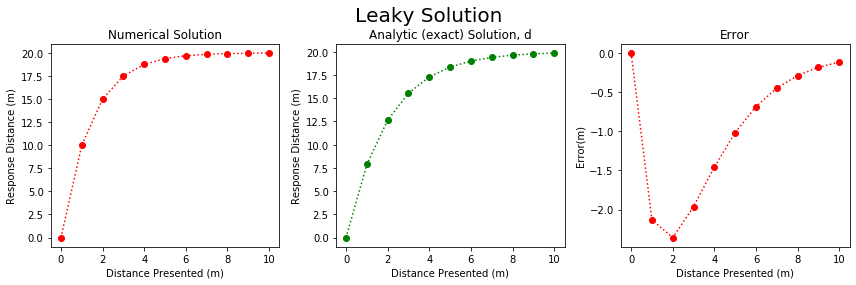

In [6]:
## Plotting Figure
fig = plt.figure(1,figsize=(12,4))

# --- left hand plot
ax = fig.add_subplot(1,3,1)
ax.plot(x,Numerical_Solution,'o:',color='red')
ax.set_xlabel('Distance Presented (m)')
ax.set_ylabel('Response Distance (m)')
#ax.legend(loc='best')
ax.set_title('Numerical Solution')

# --- middle plot
ax = fig.add_subplot(1,3,2)
ax.plot(x,Analytic_Solution,'o:',color='green')
ax.set_xlabel('Distance Presented (m)')
ax.set_ylabel('Response Distance (m)')
ax.set_title('Analytic (exact) Solution, d')

# --- right hand plot
ax = fig.add_subplot(1,3,3)
ax.plot(x,Analytic_Solution-Numerical_Solution,'o:',color='red')
ax.set_title('Error')
ax.set_ylabel('Error(m)')
ax.set_xlabel('Distance Presented (m)')

# --- title, explanatory text and save
fig.suptitle('Leaky Solution', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.85)


# References

[1] Campos, J. L., Butler, J. S., & Bülthoff, H. H. (2014). Contributions of visual and proprioceptive information to travelled distance estimation during changing sensory congruencies. Experimental brain research, 232(10), 3277-3289.